In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r"C:/Users/balag/Desktop/archive (5)/Tess"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

In [3]:
len(paths)

2800

In [4]:
df = pd.DataFrame()
df['Path'] = paths
df['Emotions'] = labels
df.head()

,Path,Emotions
0,C:/Users/balag/Desktop/archive (5)/Tess\OAF_an...,angry
1,C:/Users/balag/Desktop/archive (5)/Tess\OAF_an...,angry
2,C:/Users/balag/Desktop/archive (5)/Tess\OAF_an...,angry
3,C:/Users/balag/Desktop/archive (5)/Tess\OAF_an...,angry
4,C:/Users/balag/Desktop/archive (5)/Tess\OAF_an...,angry


In [5]:
df['Emotions'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: Emotions, dtype: int64

<AxesSubplot:xlabel='Emotions', ylabel='count'>

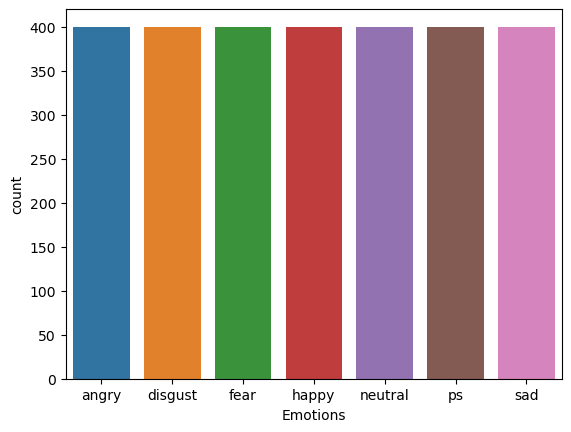

In [6]:
sns.countplot(data=df, x='Emotions')

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emot=["disgust","fear","sad","happy","angry","neutral","ps"]

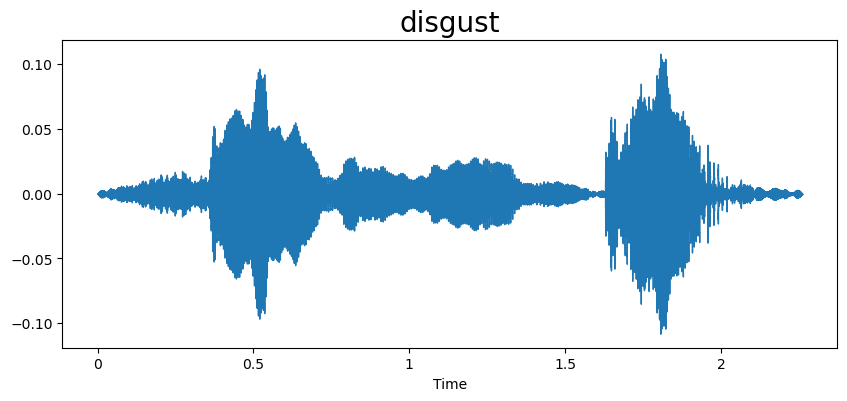

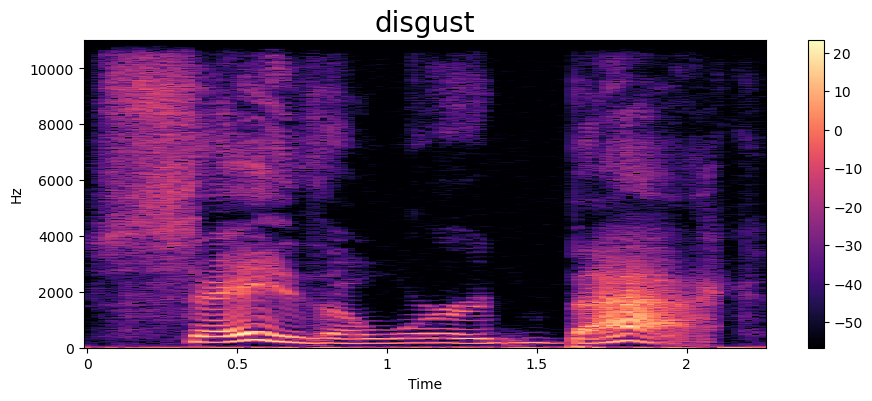

In [8]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

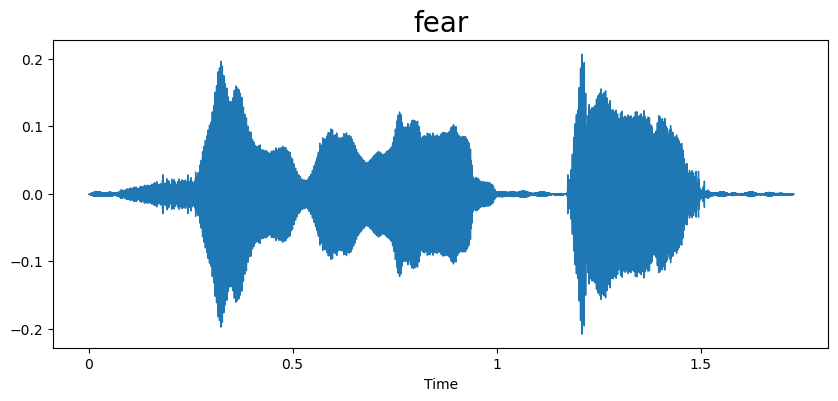

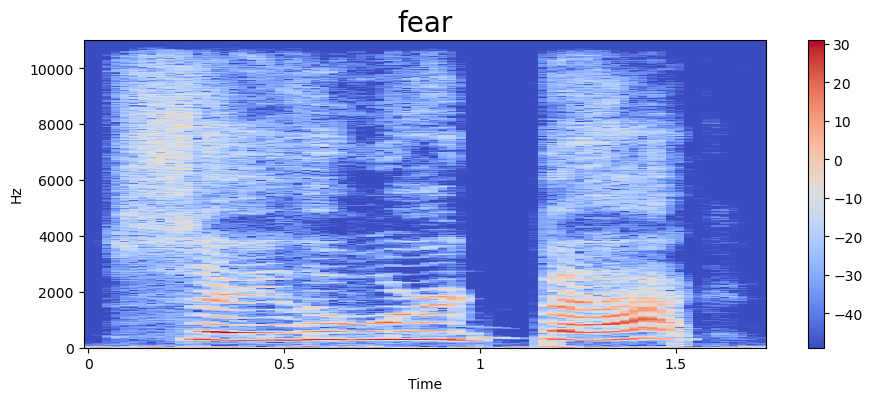

In [9]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

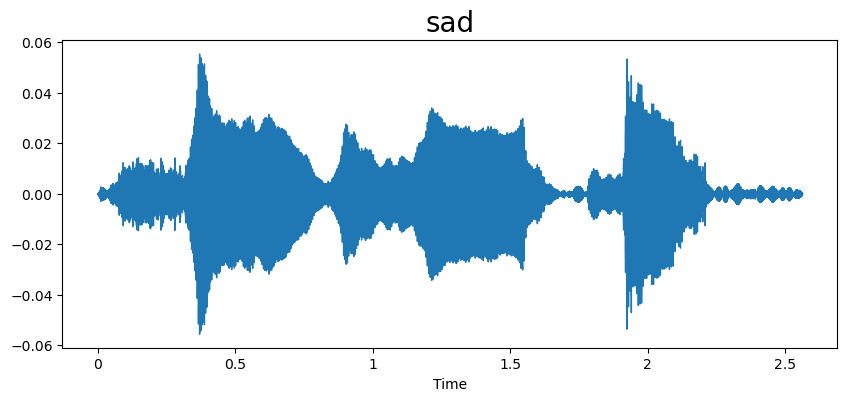

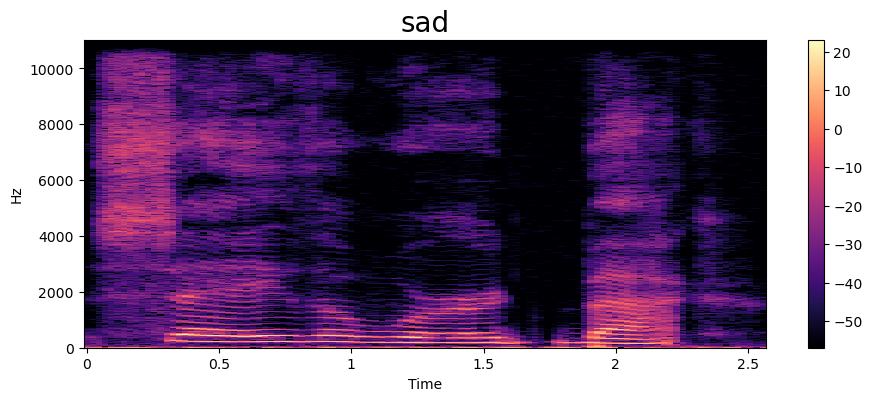

In [10]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

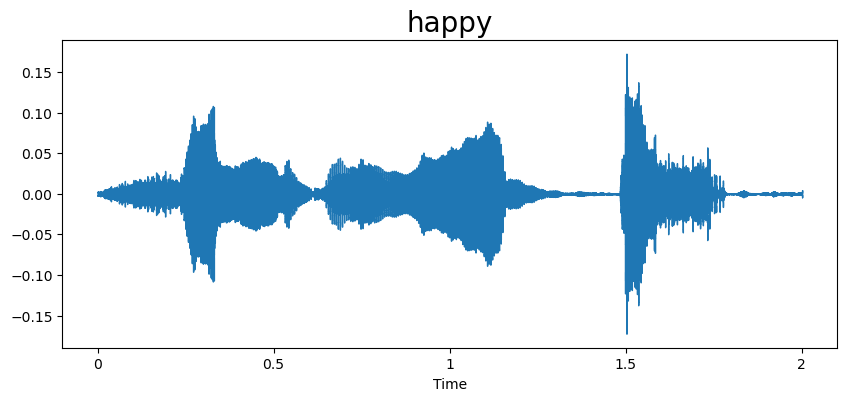

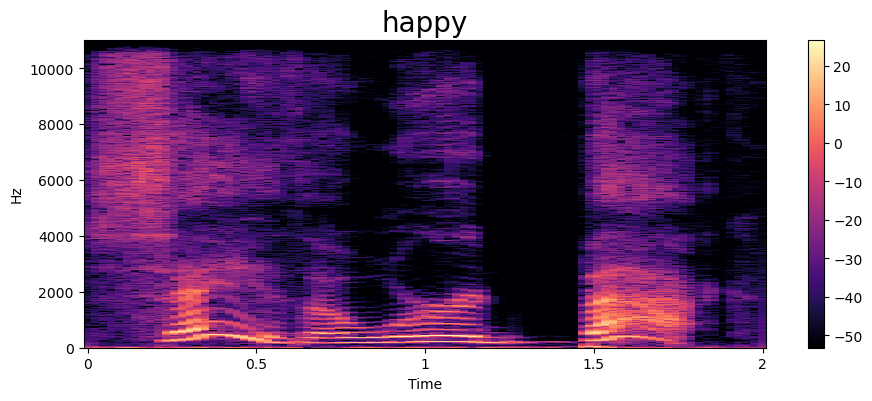

In [11]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

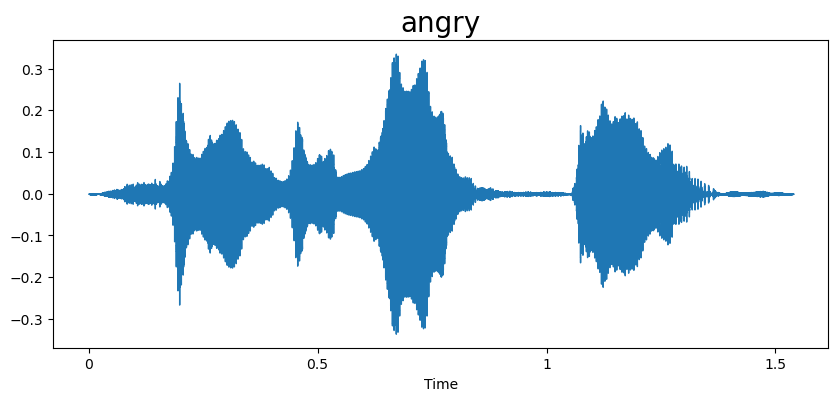

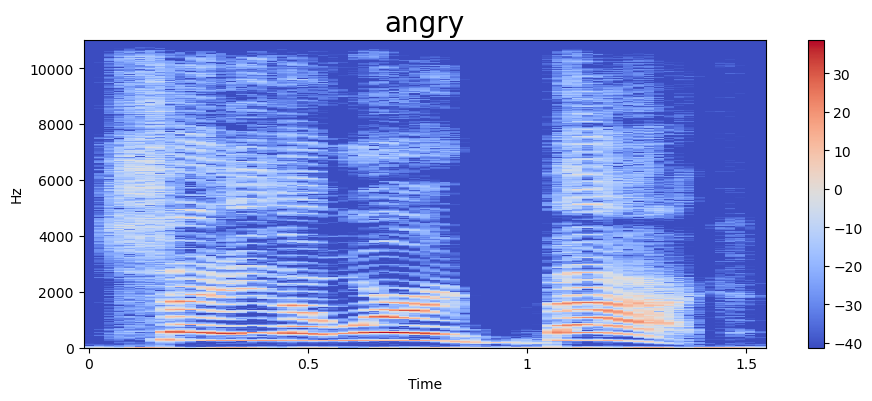

In [12]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

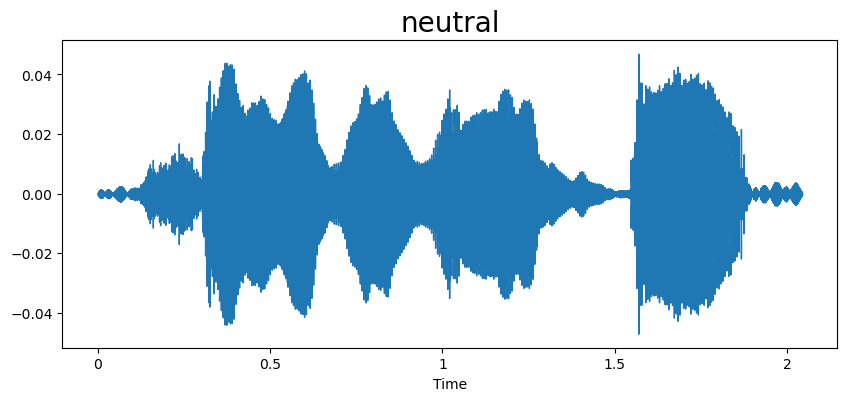

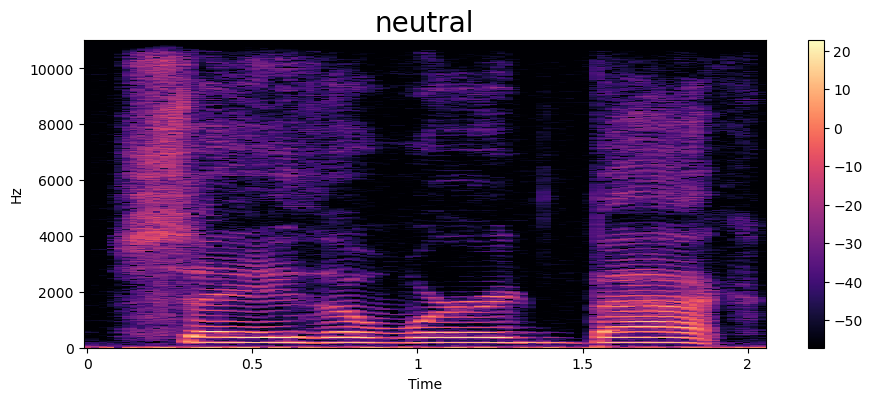

In [13]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

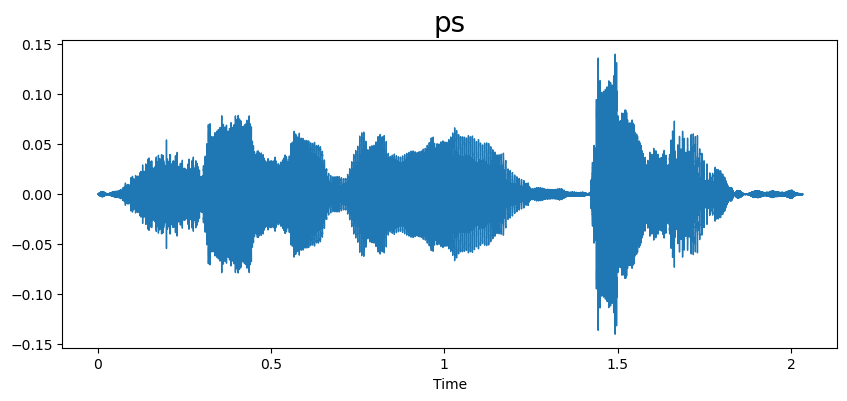

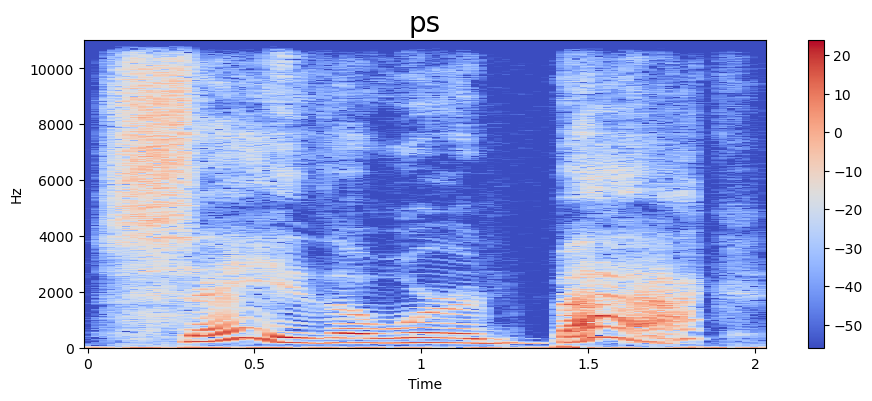

In [14]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [15]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

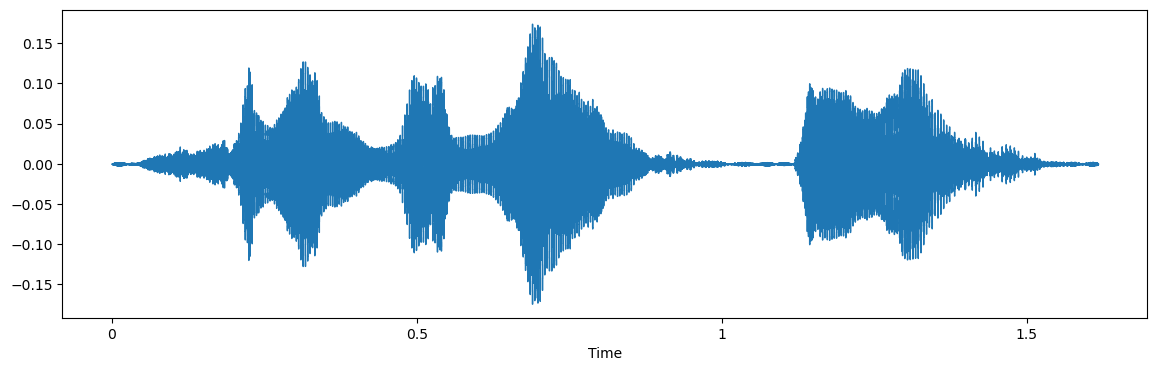

In [16]:
# simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

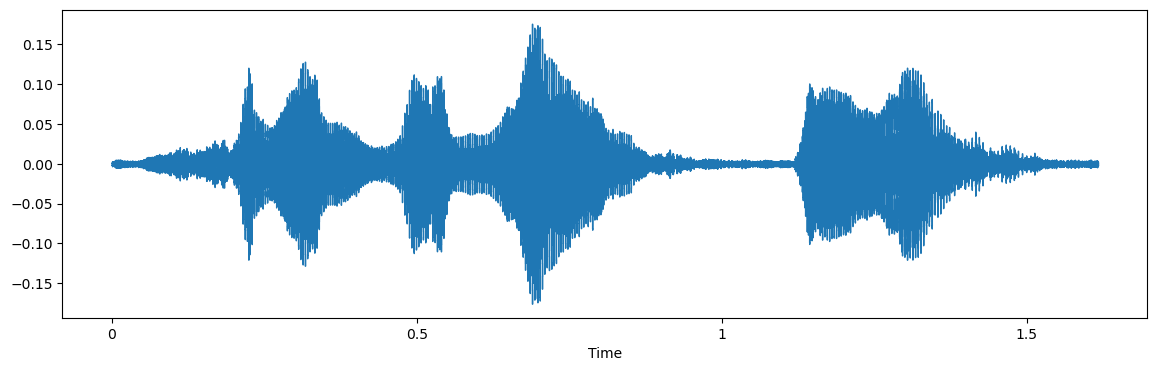

In [17]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [49]:
def extract_mfcc(audio_path):
    audio, sr = librosa.load(audio_path, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

In [50]:
X = []
y = []

In [51]:
for index, row in df.iterrows():
    audio_path = row['Path']
    emotion_label = row['Emotions']
    
    # Extract MFCC features
    mfcc_features = extract_mfcc(audio_path)
    
    X.append(mfcc_features)
    y.append(emotion_label)

In [52]:
X = np.array(X)
y = np.array(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [55]:
y_pred = svm_classifier.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.36%


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.61      0.73      0.67        74
     disgust       0.81      0.82      0.82        78
        fear       0.79      0.78      0.78        89
       happy       0.77      0.70      0.73        77
     neutral       0.87      0.92      0.89        73
          ps       0.50      0.46      0.48        87
         sad       0.94      0.90      0.92        82

    accuracy                           0.75       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.75      0.75      0.75       560



In [58]:
cm = confusion_matrix(y_test, y_pred)

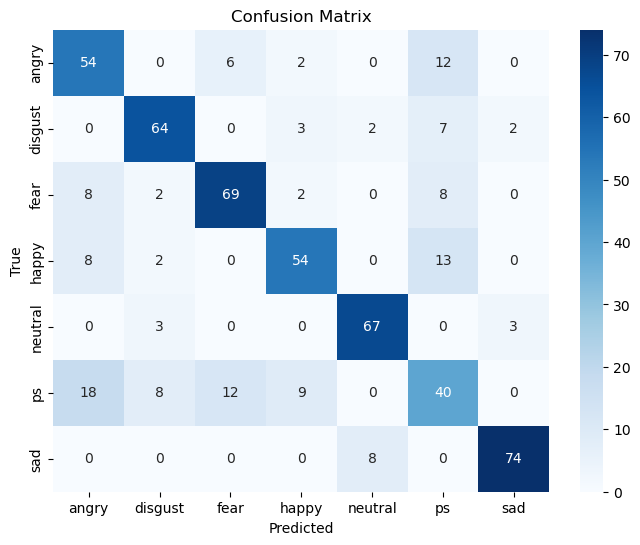

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()